# Analysis of westbound traffic on the I-94 Interstate highway

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


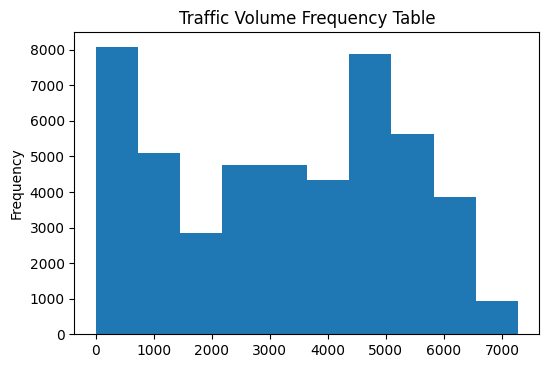

In [7]:
traffic['traffic_volume'].plot(kind='hist', title='Traffic Volume Frequency Table')
plt.show()

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [10]:
after_7 = traffic['date_time'].dt.hour > 7
before_19 = traffic['date_time'].dt.hour <= 19

traffic_daytime = traffic[after_7 & before_19]
traffic_nighttime = traffic[~(after_7 & before_19)]

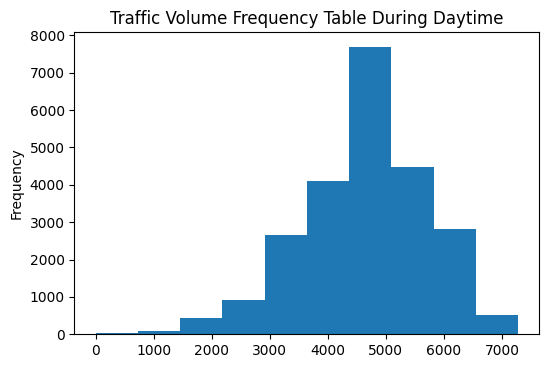

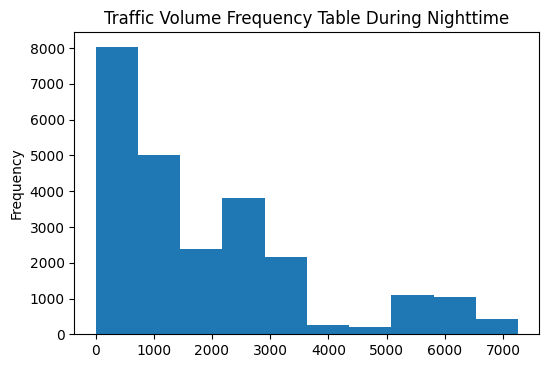

In [11]:
traffic_daytime['traffic_volume'].plot(title='Traffic Volume Frequency Table During Daytime', kind='hist')
plt.show()

traffic_nighttime['traffic_volume'].plot(title='Traffic Volume Frequency Table During Nighttime', kind='hist')
plt.show()


In [12]:
traffic_daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23759.000000,23759.000000,23759.000000,23759.000000,23759.00000
mean,282.684683,0.529855,0.000250,53.272528,4641.33924
std,13.240527,63.786491,0.008863,37.446180,1068.65102
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,273.020000,0.000000,0.000000,5.000000,4049.00000
50%,284.180000,0.000000,0.000000,75.000000,4708.00000
75%,294.085000,0.000000,0.000000,90.000000,5337.00000
max,310.070000,9831.300000,0.510000,100.000000,7280.00000


In [13]:
traffic_nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24445.000000,24445.000000,24445.000000,24445.000000,24445.000000
mean,279.768557,0.144162,0.000195,45.561669,1917.067089
std,13.275849,1.145293,0.007429,40.120177,1736.799020
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.480000,0.000000,0.000000,1.000000,532.000000
50%,281.070000,0.000000,0.000000,40.000000,1242.000000
75%,290.260000,0.000000,0.000000,90.000000,2772.000000
max,306.290000,55.630000,0.510000,100.000000,7260.000000


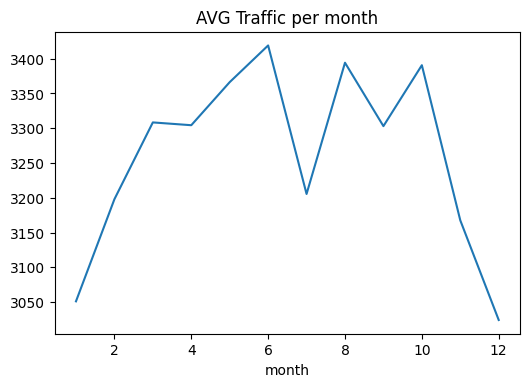

In [14]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume'].plot(title="AVG Traffic per month")
plt.show()

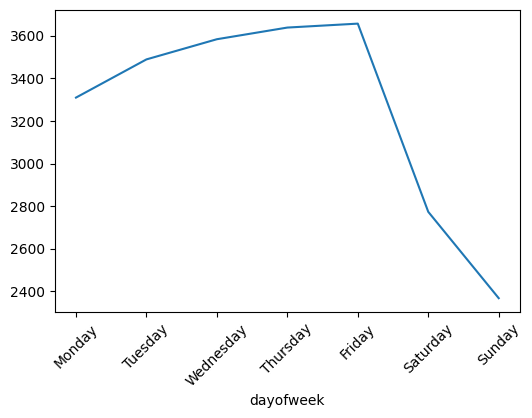

In [15]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()

days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
               3: 'Thursday', 4: 'Friday', 5: 'Saturday',
               6: 'Sunday'}
by_dayofweek = by_dayofweek.rename(index=days_of_week)
by_dayofweek['traffic_volume'].plot(rot=45)  # 0 is Monday, 6 is Sunday
plt.show()

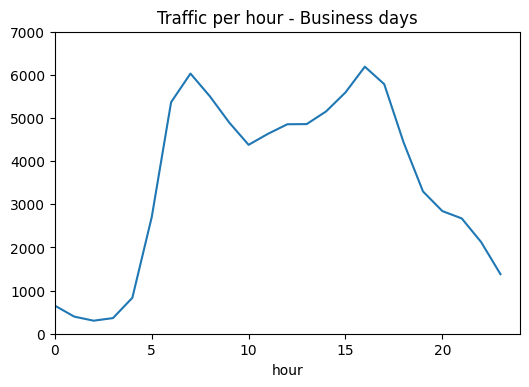

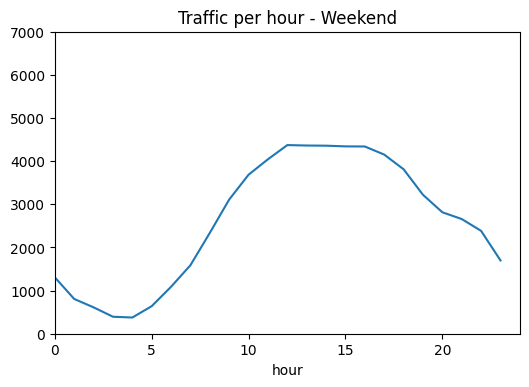

In [16]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['dayofweek'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume'].plot(title='Traffic per hour - Business days', ylim=(0,7000), xlim=(0,24))
plt.show()
by_hour_weekend['traffic_volume'].plot(title='Traffic per hour - Weekend', ylim=(0,7000), xlim=(0,24))
plt.show()

In [19]:
traffic[['traffic_volume', 'temp',
       'rain_1h', 'snow_1h',
       'clouds_all', 'weather_main',
      ]].corr() # any variable with strongest correlation with 'traffic_volume'
#traffic.corr()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.130299,0.004714,0.000733,0.067054
temp,0.130299,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.004714,0.009069,1.000000,-0.000090,0.004818
snow_1h,0.000733,-0.019755,-0.000090,1.000000,0.027931
clouds_all,0.067054,-0.101976,0.004818,0.027931,1.000000


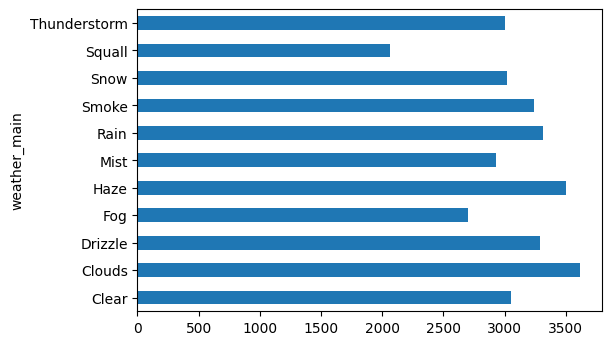

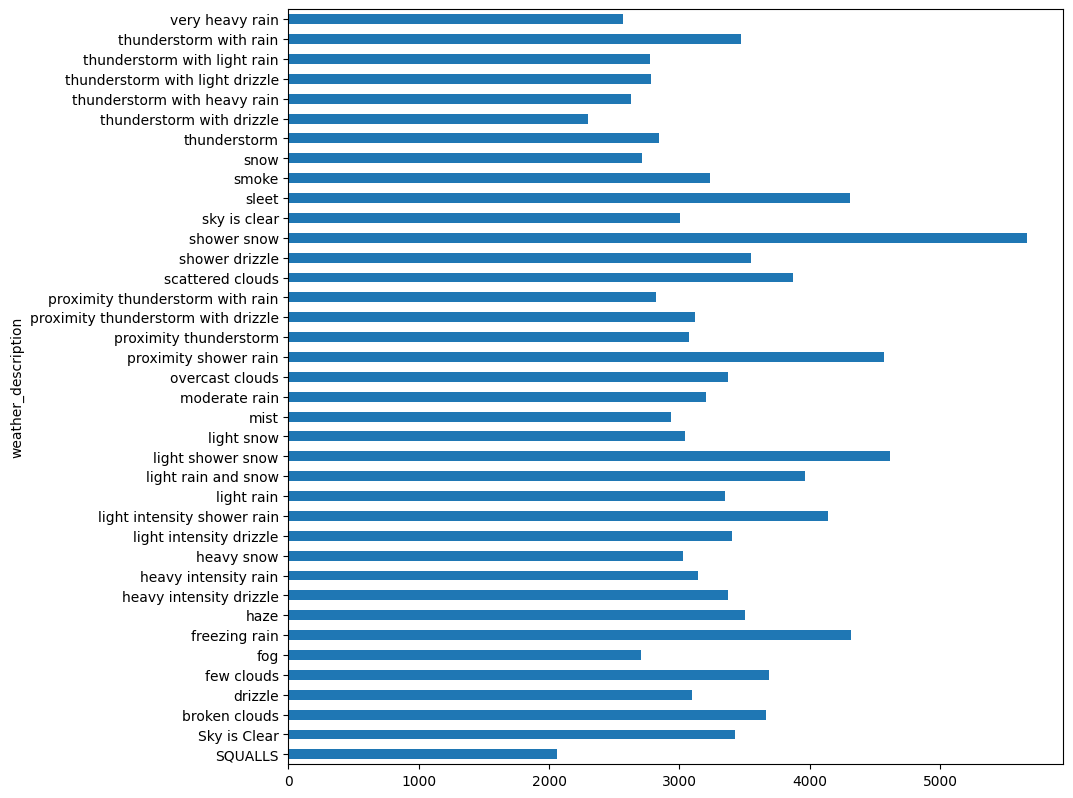

In [31]:
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot(kind='barh')
plt.show()

by_weather_description['traffic_volume'].plot(kind='barh', figsize=(10,10))
plt.show()